In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
import pickle
from sklearn.model_selection import train_test_split
import datetime
import os
import subprocess
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
mkt_df = pd.read_excel("ICICIBANK - Modified.xlsx")
validation_set = pd.read_csv("valid_set_modified1.csv")


In [9]:
mkt_df['Date'] = pd.to_datetime(mkt_df['Date']).astype('int64')

In [10]:
mkt_df.set_index('Date').head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1025481600000000000,25.454500,25.818199,24.818199,25.127300,6.023036,2047540.0
1025568000000000000,26.727301,27.636400,25.236401,26.745399,6.410896,5546354.0
1025654400000000000,28.181801,28.181801,26.645500,28.090900,6.733414,5745267.0
1025740800000000000,27.090900,28.799999,27.036400,27.390900,6.565624,3896602.0
1025827200000000000,27.881800,27.863600,26.945400,27.672701,6.633172,3261038.0


In [11]:
mkt_df = mkt_df.dropna()

In [12]:
def normalizeY(ydf):
    ydf = (ydf + 1) / 2
    return ydf

In [13]:
mkt_df.shape

(4054, 7)

# Train and Test

In [14]:
train = mkt_df[0:3500]
test = mkt_df[3501:4093]

In [15]:
train.columns
print(train[:5],test[:5])

                  Date       Open       High        Low      Close  Adj Close  \
0  1025481600000000000  25.454500  25.818199  24.818199  25.127300   6.023036   
1  1025568000000000000  26.727301  27.636400  25.236401  26.745399   6.410896   
2  1025654400000000000  28.181801  28.181801  26.645500  28.090900   6.733414   
3  1025740800000000000  27.090900  28.799999  27.036400  27.390900   6.565624   
4  1025827200000000000  27.881800  27.863600  26.945400  27.672701   6.633172   

      Volume  
0  2047540.0  
1  5546354.0  
2  5745267.0  
3  3896602.0  
4  3261038.0                        Date        Open        High         Low       Close  \
3575  1477440000000000000  252.182007  258.591003  251.817993  253.091003   
3576  1477526400000000000  256.364014  259.091003  250.000000  258.454987   
3577  1477612800000000000  254.044998  256.817993  250.500000  251.682007   
3578  1477958400000000000  245.455002  254.317993  249.544998  250.317993   
3579  1478044800000000000  247.272995 

# X-Y Split

In [16]:
#Predicting next day value 
x_train = train[['Date', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_train = train[['Open']]
x_test = test[['Date', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_test = test[['Open']]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3500, 6) (3500, 1) (553, 6) (553, 1)


# MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))


In [18]:
X_train = scaler.fit_transform(x_train)
Y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(x_test)
Y_test = scaler.fit_transform(y_test)

# Shapes

In [19]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3500, 6) (3500, 1) (553, 6) (553, 1)


# Model - SVR

In [20]:

from sklearn.svm import SVR
model = SVR(cache_size=1000, verbose = True)
model.fit(X_train, Y_train)

#from sklearn.externals import joblib
#savedModel = 'model.joblib'
#joblib.dump(model, savedModel)

[LibSVM]

/home/siddhesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/siddhesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=1000, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=True)

In [21]:
y_pred = model.predict(X_test)

# Plotting Results

[]

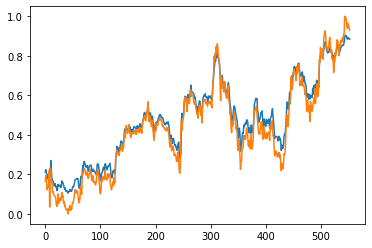

In [22]:
plt.plot(y_pred)
plt.plot(Y_test)
plt.plot()


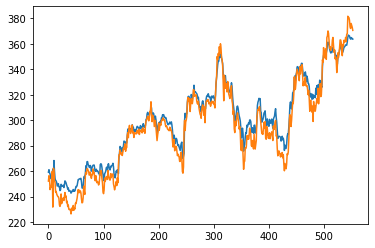

In [23]:
plt.plot(scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)))
plt.plot(scaler.inverse_transform(np.array(Y_test).reshape(-1, 1)))

In [24]:
def MAE(predictions, actual):
    abs_err = [abs(prediction - actualVal) for prediction, actualVal in zip(predictions,actual)]
    mae = sum(abs_err)/len(actual)
    print("MAE =" , mae)
    return mae

def rmse(predictions, targets):
    return print("RMSE =", np.sqrt(((predictions - targets) ** 2).mean()))

In [25]:
print(MAE(y_pred,Y_test))
print(rmse(y_pred, Y_test))

MAE = [0.04411975]
[0.04411975]
RMSE = 0.31300496191790583
None


# Validation

In [26]:
valid_data = pd.read_csv("valid_set_modified1.csv")

In [27]:
def Preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date']).astype('int64')
    df.set_index('Date').head()
    df = df.dropna()
    df.shape
    return(df)

In [28]:
Valid_data = Preprocessing(valid_data)

In [29]:
x_valid = Valid_data[['Date', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_vaild = Valid_data[['Open']]

In [30]:

scaler = MinMaxScaler(feature_range=(0, 1))
X_valid = scaler.fit_transform(x_valid)
Y_valid = scaler.fit_transform(y_vaild)


In [31]:
print(X_valid.shape,Y_valid.shape)

(22, 6) (22, 1)


In [32]:
pred_valid = model.predict(X_valid)
pred_valid.shape

(22,)

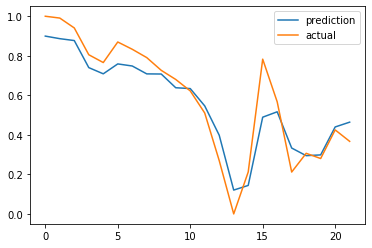

In [33]:
plt.plot(pred_valid,  label='prediction' )
plt.plot(Y_valid,  label='actual')
plt.legend(loc='upper right')
plt.show()

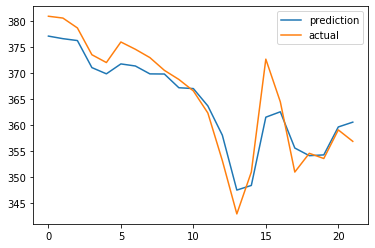

In [34]:
plt.plot(scaler.inverse_transform(np.array(pred_valid).reshape(-1, 1)),label='prediction')
plt.plot(scaler.inverse_transform(np.array(Y_valid).reshape(-1, 1)),label='actual')
plt.legend(loc='upper right')
plt.show()

In [35]:
MAE(pred_valid,Y_valid)
rmse(pred_valid,Y_valid)

MAE = [0.07733455]
RMSE = 0.3634026523775957
